In [1]:
# General Imports
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

# Scripts 
folder_path = os.path.abspath("scripts")
sys.path.append(folder_path)

# Visualization Tools
from visualization_tools import visualize_grid_simulations

# Minkowski Functionals
from Minkowski_Fractal_Dimension import standard_minkowski_functionals, circle_corrected_minkowski_functionals

# 2D Gaussian
from Gaussian import generate_2d_gaussian

[09:57:37] ERROR    PARDISO solver not installed, run `pip install pypardiso`. Otherwise,          ]8;id=985681;file://c:\Users\User\anaconda3\envs\Astronomy_Env\Lib\site-packages\openpnm\utils\_workspace.py\_workspace.py]8;;\:]8;id=191422;file://c:\Users\User\anaconda3\envs\Astronomy_Env\Lib\site-packages\openpnm\utils\_workspace.py#56\56]8;;\
                    simulations will be slow. Apple M chips not supported.                                         

## **Gaussians**
Here we will analyze some effects on Gaussians for different scenarions and see what effect they have on the calculation of the Minkowski Functional. If a corrected version for the specific geometry has been implemented, this will also be shown. For more on this topic read `Validity_PA_BC.ipynb`.

### **Cut-Off Effects**

The first effect to be analyzed is the contribution that straight lines (cut-off) can have on the fractal dimension. This is not very critical in our dataset, as the threshold and the regions where this happens are often the ones that include lower-resolution Planck data, and those can be easily left out. Both the standard Minkowski fractal dimension and the circle corrected one are shown in the graph.   

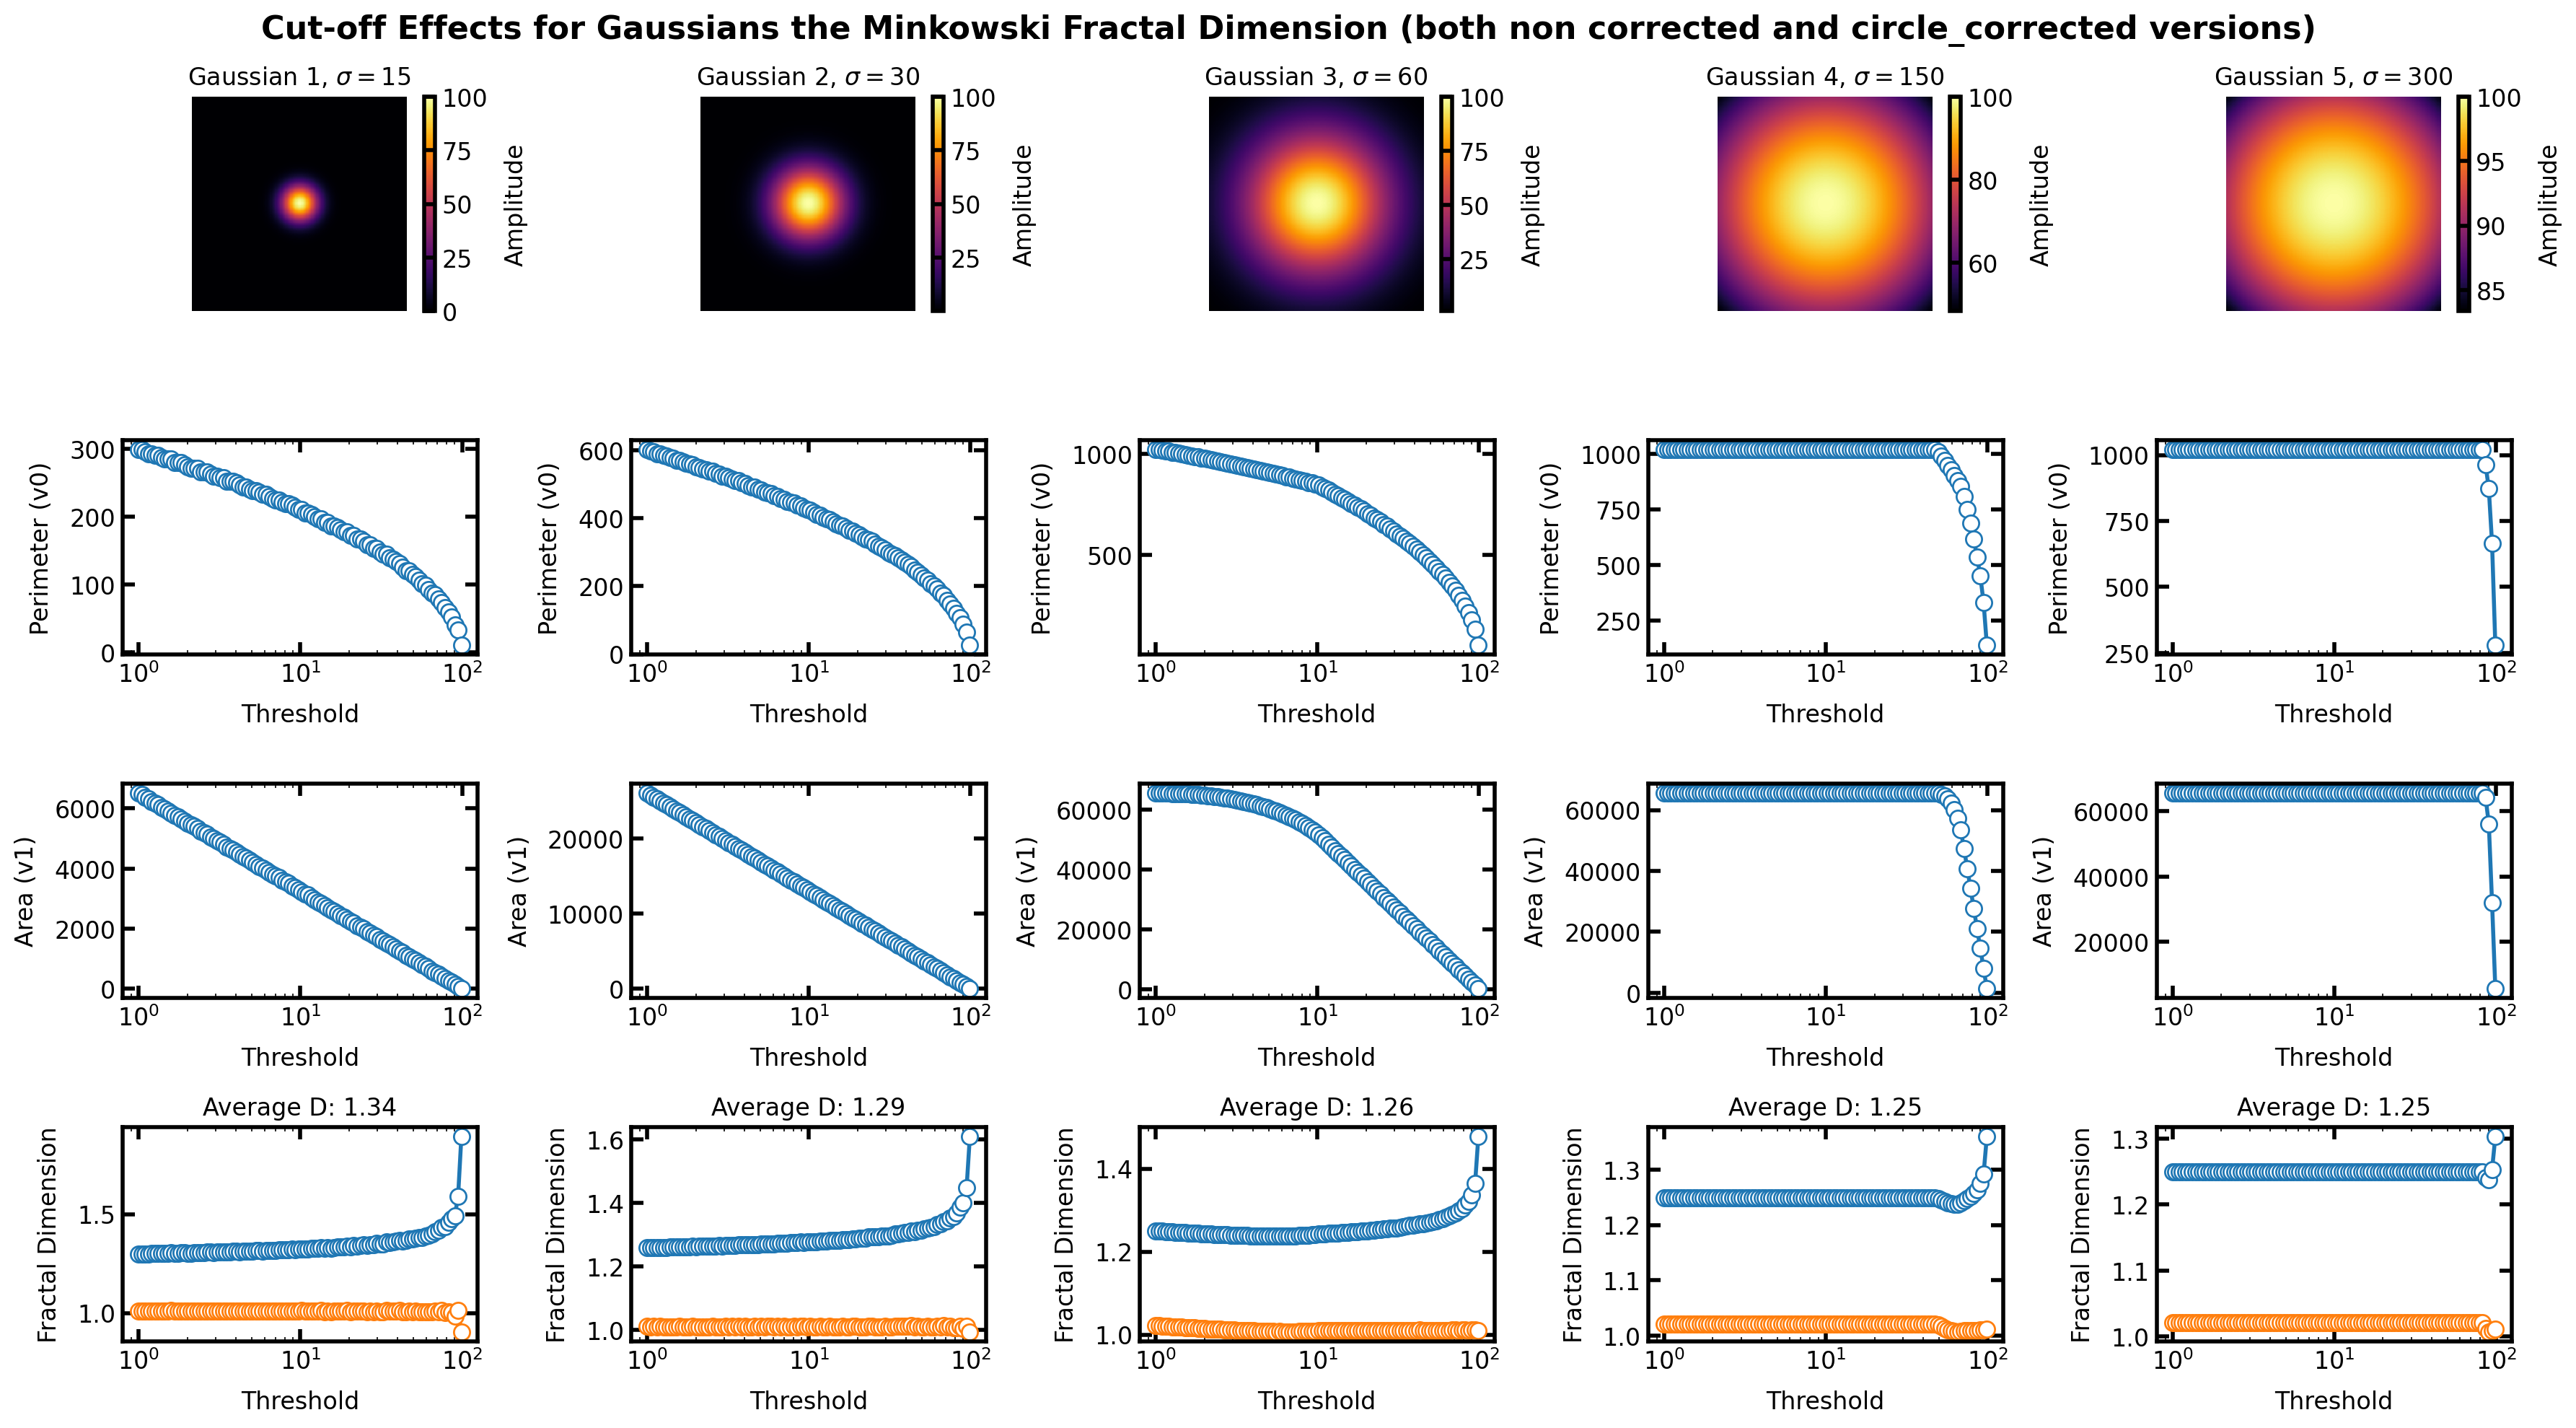

In [2]:
# Parameters for the Gaussian
shape = (256, 256)
centers = [(128, 128), (128, 128), (128, 128), (128, 128), (128, 128)]  # Center of Gaussian
sigmas = [15, 30, 60, 150, 300]  # Standard deviations, increasing size

# Generate Gaussian distributions
gaussians = [100*generate_2d_gaussian(shape, centers[i], sigmas[i]) for i in range(len(sigmas))]

# Analyze each Gaussian using the Minkowski function
results = []
results_correction = []

for i, gaussian in enumerate(gaussians):
    result = standard_minkowski_functionals(gaussian, threshold_min=1, threshold_max=99)
    result_correction = circle_corrected_minkowski_functionals(gaussian, threshold_min=1, threshold_max=99)

    results.append(result)
    results_correction.append(result_correction)

visualize_grid_simulations(gaussians, 
                           shape, sigmas, results, results_correction, name_shape="Gaussian", 
                           suptitle="Cut-off Effects for Gaussians the Minkowski Fractal Dimension (both non corrected and circle_corrected versions)"
                           )

### **Small Scales**

One of the most important numerical effects that can also be seen when working on real data is when the dimension is calculated on extremely small scales. Where both areas and perimeter go towards zero, the method shoots off to infinity and create some artifacts. These are normally easy to notice (very rapid increment) and we see here some examples.

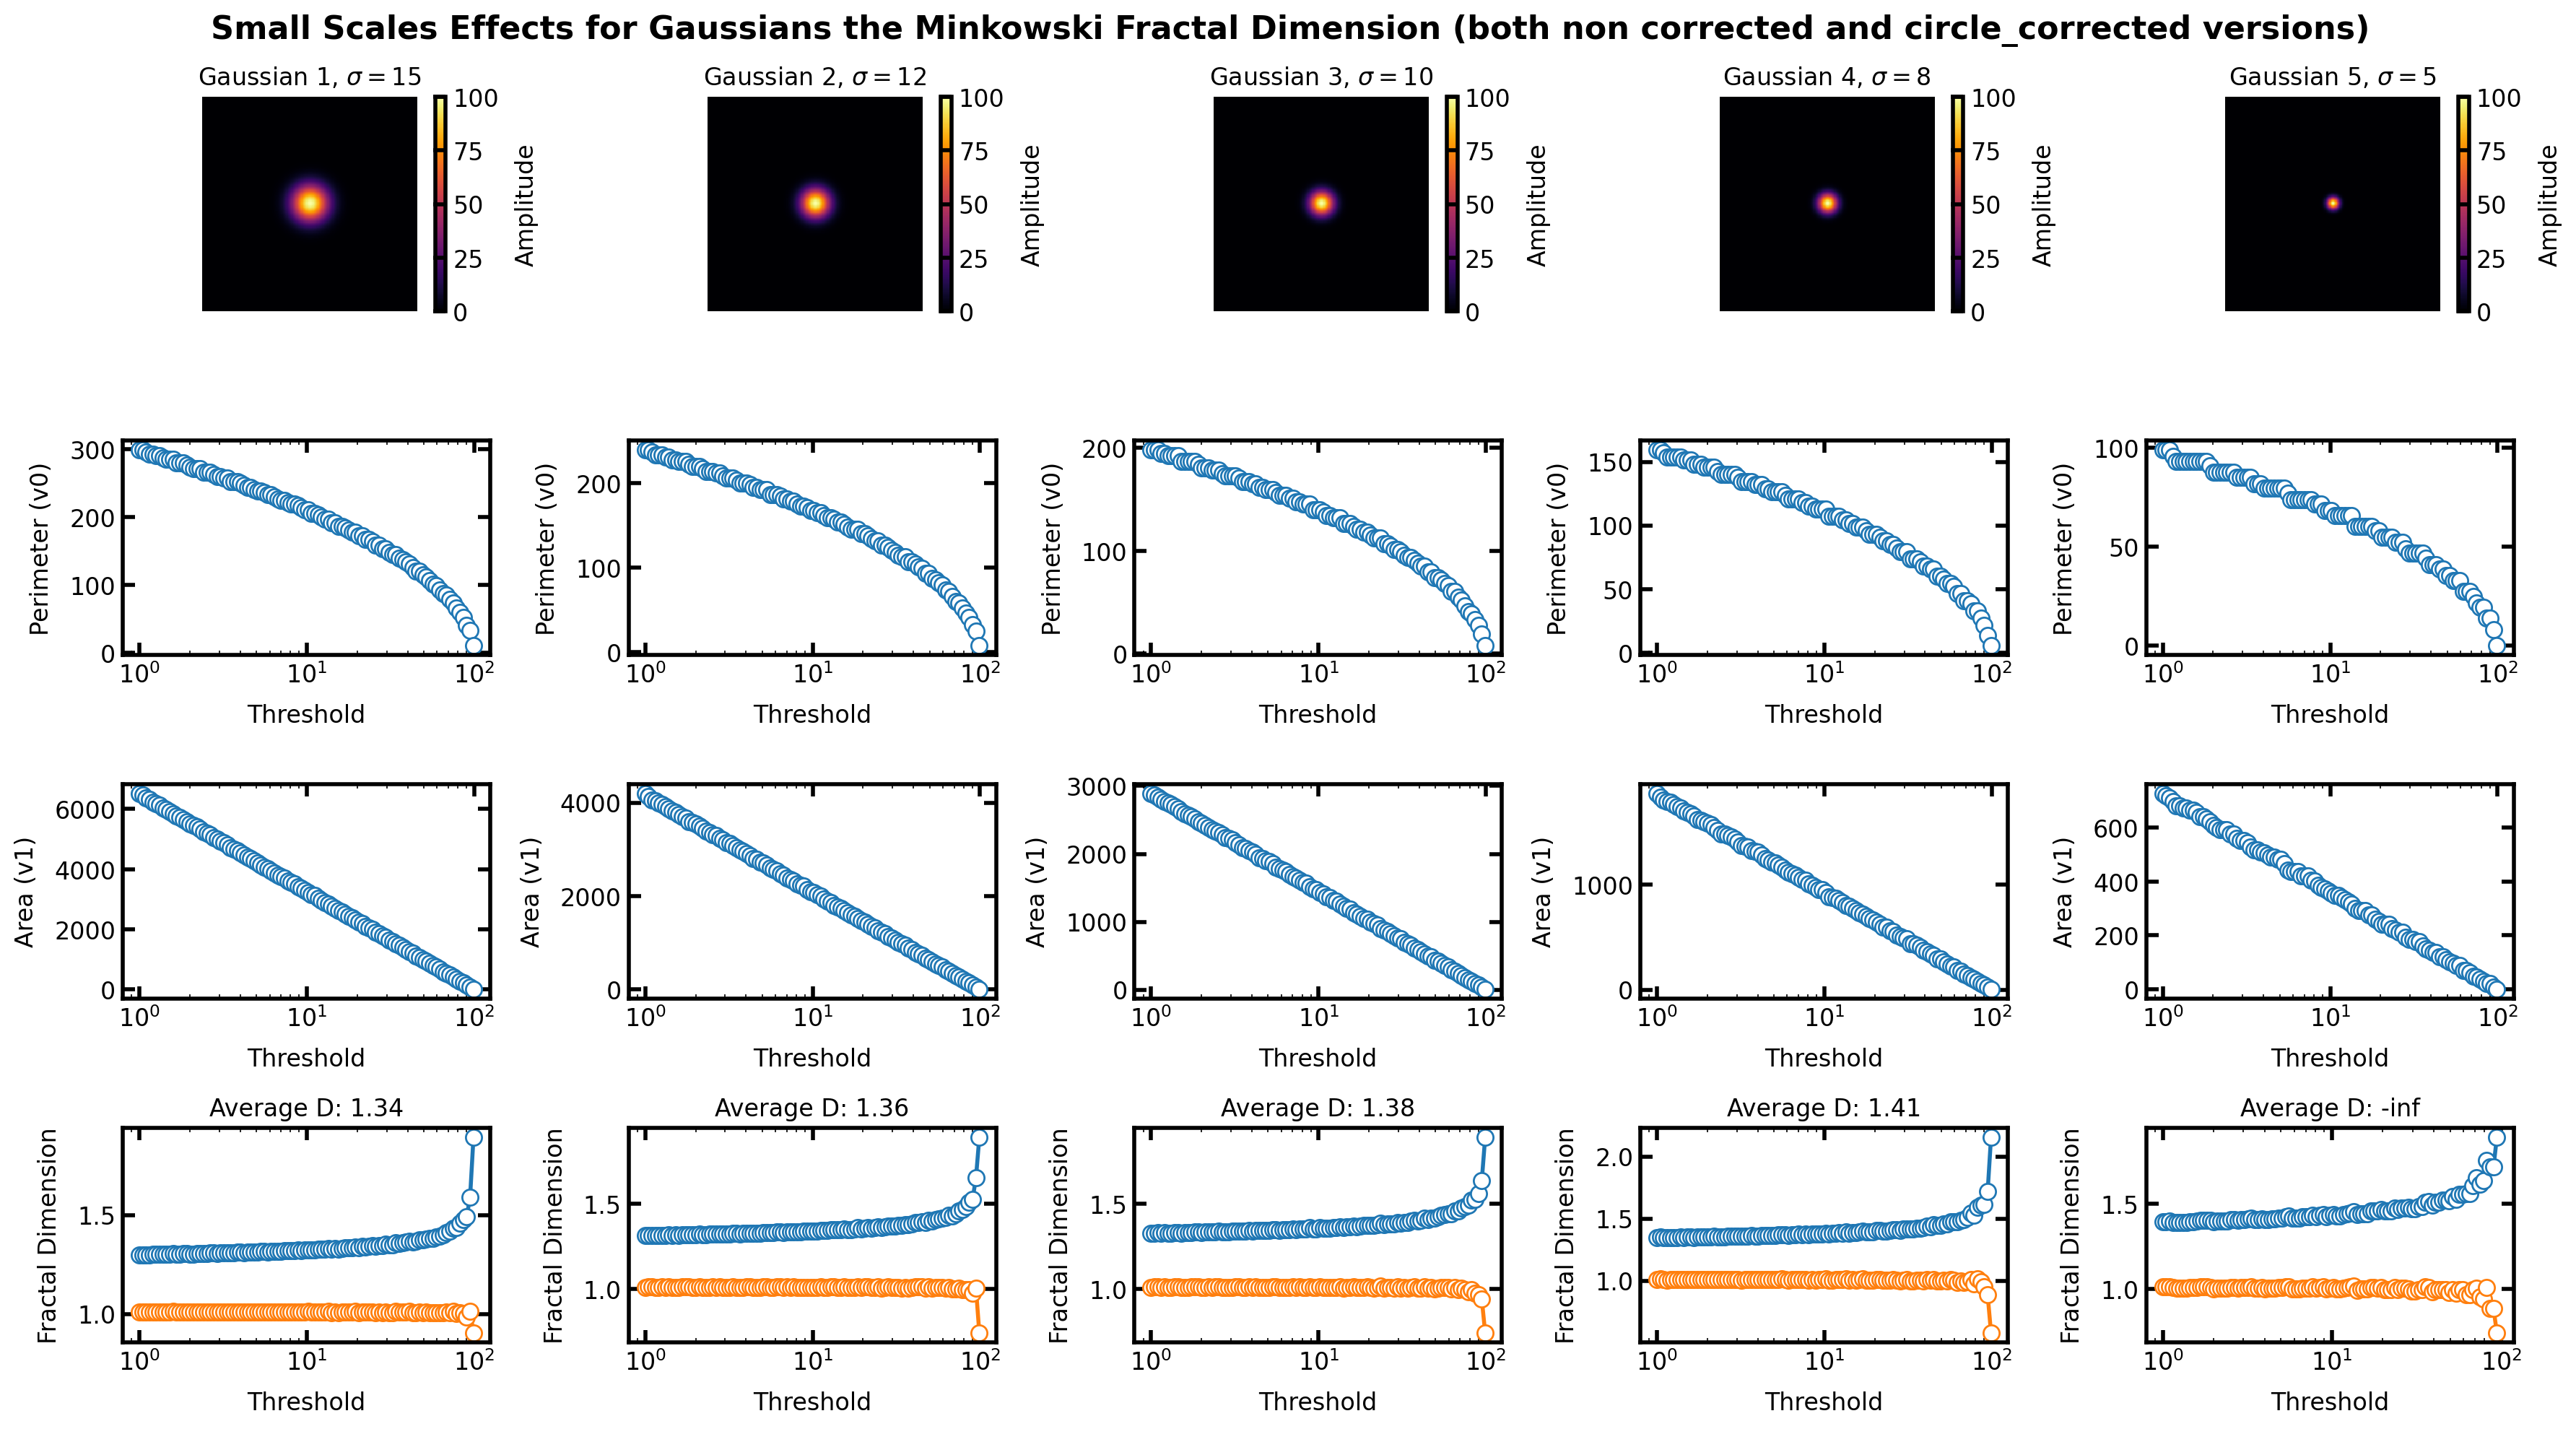

In [3]:
# Parameters for the Gaussian
shape = (256, 256)
centers = [(128, 128), (128, 128), (128, 128), (128, 128), (128, 128)]  # Center of Gaussian
sigmas = [15, 12, 10, 8, 5]  # Standard deviations, increasing size

# Generate Gaussian distributions
gaussians = [100*generate_2d_gaussian(shape, centers[i], sigmas[i]) for i in range(len(sigmas))]

# Analyze each Gaussian using the Minkowski function
results = []
results_correction = []

for i, gaussian in enumerate(gaussians):
    result = standard_minkowski_functionals(gaussian, threshold_min=1, threshold_max=99)
    result_correction = circle_corrected_minkowski_functionals(gaussian, threshold_min=1, threshold_max=99)

    results.append(result)
    results_correction.append(result_correction)

visualize_grid_simulations(gaussians, 
                           shape, sigmas, results, results_correction, name_shape="Gaussian", 
                           suptitle="Small Scales Effects for Gaussians the Minkowski Fractal Dimension (both non corrected and circle_corrected versions)"
                           )

## Inspecting a Gaussian at different thresholds

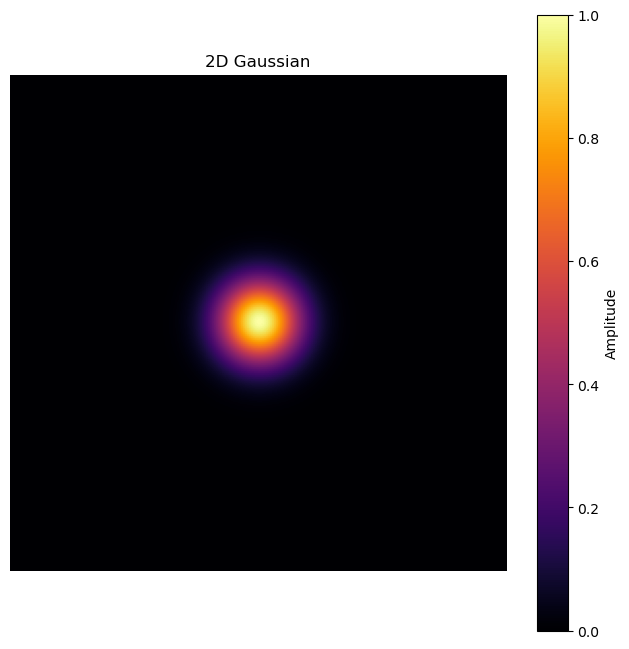

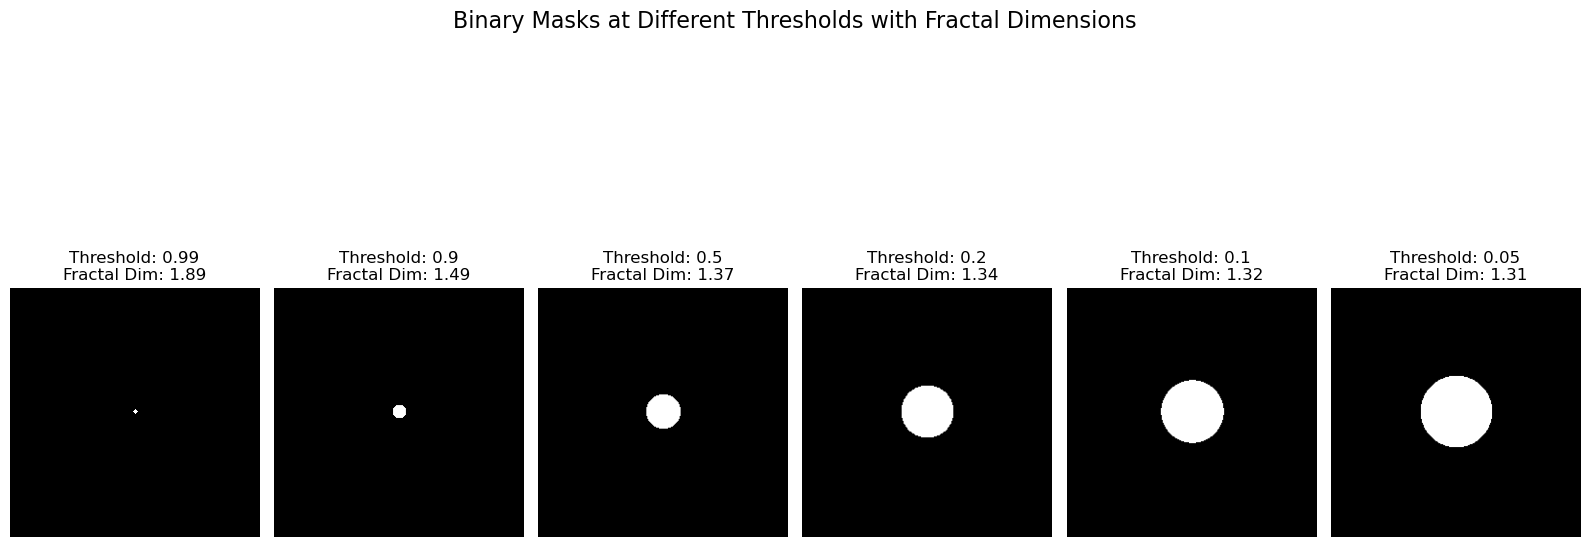

Threshold: 0.99, Fractal Dimension: 1.89
Threshold: 0.9, Fractal Dimension: 1.49
Threshold: 0.5, Fractal Dimension: 1.37
Threshold: 0.2, Fractal Dimension: 1.34
Threshold: 0.1, Fractal Dimension: 1.32
Threshold: 0.05, Fractal Dimension: 1.31


In [4]:
# Generate a single 2D Gaussian
shape = (256, 256)
center = (128, 128)  # Center of the Gaussian
sigma = 15  # Standard deviation of the Gaussian
gaussian = generate_2d_gaussian(shape, center, sigma)

# Visualize the Gaussian
plt.figure(figsize=(8, 8))
plt.imshow(gaussian, origin='lower', cmap='inferno', extent=[0, shape[0], 0, shape[1]])
plt.colorbar(label="Amplitude")
plt.title("2D Gaussian")
plt.axis("off")
plt.show()

# Thresholds for visualization
thresholds = [0.99, 0.9, 0.5, 0.2, 0.1, 0.05]  # Example thresholds
fractal_dimensions = []  # To store fractal dimensions

# Calculate fractal dimensions and plot binary masks
plt.figure(figsize=(16, 8))

for i, threshold in enumerate(thresholds):
    # Create binary mask
    mask = gaussian >= threshold
    
    # Compute Minkowski functionals for the mask
    area = np.sum(mask)
    perim = perimeter(mask)
    if area > 0 and perim > 0:  # Avoid invalid fractal dimension
        fractal_dimension = 2 * np.log10(perim) / np.log10(area)
    else:
        fractal_dimension = np.nan  # Assign NaN if invalid
    fractal_dimensions.append(fractal_dimension)

    # Plot the binary mask
    plt.subplot(1, len(thresholds), i + 1)
    plt.imshow(mask, origin='lower', cmap='gray', extent=[0, shape[0], 0, shape[1]])
    plt.title(f"Threshold: {threshold}\nFractal Dim: {fractal_dimension:.2f}")
    plt.axis("off")

plt.suptitle("Binary Masks at Different Thresholds with Fractal Dimensions", fontsize=16)
plt.tight_layout()
plt.show()

# Print fractal dimensions for reference
for t, fd in zip(thresholds, fractal_dimensions):
    print(f"Threshold: {t}, Fractal Dimension: {fd:.2f}")


# Filaments

Analyzing Filament 1 with XX 
Analyzing Filament 2 with XX 
Analyzing Filament 3 with XX 
Analyzing Filament 4 with XX 
Analyzing Filament 5 with XX 


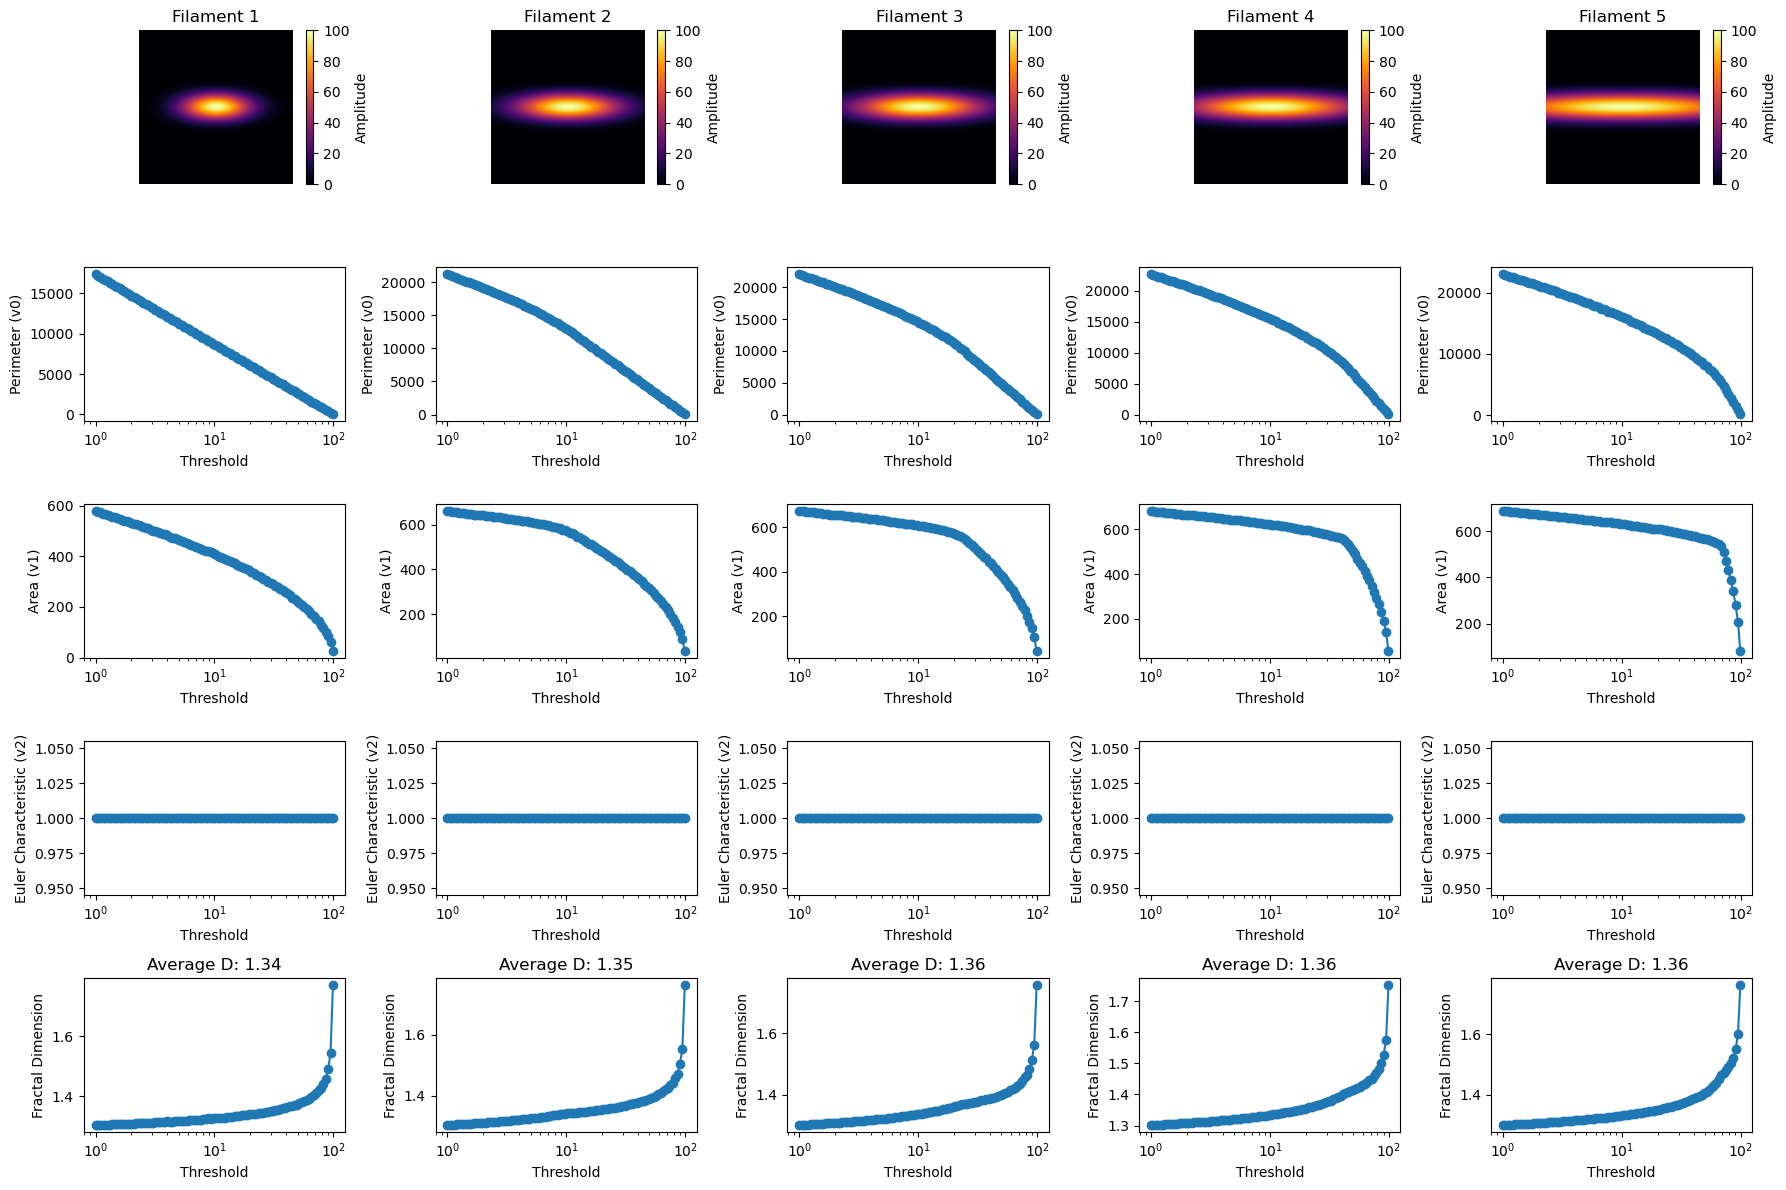

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def generate_filament(shape, center, length, width, angle):
    """
    Generate a single filamentary (cylindrical) structure in 2D.

    Parameters:
    - shape: Tuple (nx, ny), the size of the 2D grid.
    - center: Tuple (x0, y0), the center of the filament.
    - length: Length of the filament.
    - width: Width (standard deviation) of the filament.
    - angle: Angle of the filament in degrees (0 = horizontal).

    Returns:
    - filament: 2D array containing the filamentary structure.
    """
    x = np.arange(0, shape[0])
    y = np.arange(0, shape[1])
    xx, yy = np.meshgrid(x, y)

    # Rotate the grid to align the filament with the given angle
    x_rot = (xx - center[0]) * np.cos(np.radians(angle)) + (yy - center[1]) * np.sin(np.radians(angle))
    y_rot = -(xx - center[0]) * np.sin(np.radians(angle)) + (yy - center[1]) * np.cos(np.radians(angle))

    # Create the filament as a Gaussian along the rotated x-axis
    filament = np.exp(-((x_rot**2) / (2 * (length / 2)**2) + (y_rot**2) / (2 * (width / 2)**2)))
    return filament

# Parameters for the Gaussian
shape = (256, 256) # Size of the grid
centers = [(128, 128), (128, 128), (128, 128), (128, 128), (128, 128)]  # Center of the filament

lengths = [80, 120, 150, 200, 300]  # Length of the filament
widths = [30, 30, 30, 30, 30]  # Width of the filament
angles = [0, 0, 0, 0, 0]  # Angle in degrees (e.g., 30°)

# Generate Gaussian distributions
filaments = [100*generate_filament(shape, centers[i], lengths[i], widths[i], angles[i]) for i in range(len(centers))]

# Analyze each Gaussian using the Minkowski function
results = []

# Visualize all Gaussians and their Minkowski functional results
plt.figure(figsize=(18, 12))
    
# Analyze each Gaussian
results = []
for i, filament in enumerate(filaments):
    print(f"Analyzing Filament {i+1} with XX ")
    result = minkowski_funct(filament, region_name=f"Gaussian {i+1}", threshold_min=1, threshold_max=99)
    results.append(result)

# First row: Gaussian images
for i, filament in enumerate(filaments):
    plt.subplot(5, len(filaments), i + 1)
    plt.imshow(filament, origin='lower', cmap='inferno', extent=[0, shape[0], 0, shape[1]])
    plt.title(f"Filament {i+1}")
    plt.colorbar(label="Amplitude")
    plt.axis("off")

# Second, third, fourth rows: Minkowski functionals
labels = ["Perimeter (v0)", "Area (v1)", "Euler Characteristic (v2)", "Fractal Dimension"]

for j in range(4):  # One row for each functional
    for i, filament in enumerate(filaments):
        plt.subplot(5, len(filaments), (j + 1) * len(filaments) + i + 1)
        plt.plot(results[i]["thresholds"], results[i]["values"][j], 'o-')
        plt.xlabel("Threshold")
        plt.ylabel(labels[j])
        plt.xscale("log")
        if j == 3:  # For the fractal dimension row
            avg_fractal_dim = np.nanmean(results[i]["values"][j]) 
            plt.title(f"Average D: {avg_fractal_dim:.2f}")
            
plt.tight_layout()
plt.show()

# Combination

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate a Gaussian with random center and size
def generate_random_gaussian(shape, max_sigma):
    """
    Generate a random Gaussian with random center and size.
    Parameters:
    - shape: Tuple (nx, ny), the size of the 2D grid.
    - max_sigma: Maximum standard deviation for Gaussian size.
    Returns:
    - gaussian: 2D array with the Gaussian distribution.
    """
    center = (np.random.randint(0, shape[0]), np.random.randint(0, shape[1]))
    sigma = np.random.uniform(5, max_sigma)  # Random standard deviation
    x = np.arange(0, shape[0])
    y = np.arange(0, shape[1])
    xx, yy = np.meshgrid(x, y)
    gaussian = np.exp(-(((xx - center[0])**2 + (yy - center[1])**2) / (2 * sigma**2)))
    return gaussian

# Function to generate a filament with random center, size, and orientation
def generate_random_filament(shape, max_length, max_width):
    """
    Generate a random filamentary object with random center, size, and angle.
    Parameters:
    - shape: Tuple (nx, ny), the size of the 2D grid.
    - max_length: Maximum length of the filament.
    - max_width: Maximum width of the filament.
    Returns:
    - filament: 2D array with the filamentary structure.
    """
    center = (np.random.randint(0, shape[0]), np.random.randint(0, shape[1]))
    length = np.random.uniform(30, max_length)  # Random length
    width = np.random.uniform(6, max_width)    # Random width
    angle = np.random.uniform(0, 180)          # Random orientation
    x = np.arange(0, shape[0])
    y = np.arange(0, shape[1])
    xx, yy = np.meshgrid(x, y)
    x_rot = (xx - center[0]) * np.cos(np.radians(angle)) + (yy - center[1]) * np.sin(np.radians(angle))
    y_rot = -(xx - center[0]) * np.sin(np.radians(angle)) + (yy - center[1]) * np.cos(np.radians(angle))
    filament = np.exp(-((x_rot**2) / (2 * (length / 2)**2) + (y_rot**2) / (2 * (width / 2)**2)))
    return filament

# Function to create a mixed field with Gaussians and filaments
def create_mixed_field(shape, num_objects, max_sigma, max_length, max_width, mix_ratio=1):
    """
    Create a field with a mix of Gaussian and filamentary objects.
    Parameters:
    - shape: Size of the 2D grid (nx, ny).
    - num_objects: Total number of objects to place.
    - max_sigma: Maximum size for Gaussians.
    - max_length, max_width: Maximum size for filaments.
    - mix_ratio: Proportion of Gaussians (0.5 = equal mix).
    Returns:
    - field: 2D array with the mixed field.
    """
    field = np.zeros(shape)
    num_gaussians = int(num_objects * mix_ratio)
    num_filaments = num_objects - num_gaussians

    # Add Gaussians
    for _ in range(num_gaussians):
        field += generate_random_gaussian(shape, max_sigma)

    # Add Filaments
    for _ in range(num_filaments):
        field += generate_random_filament(shape, max_length, max_width)

    return field

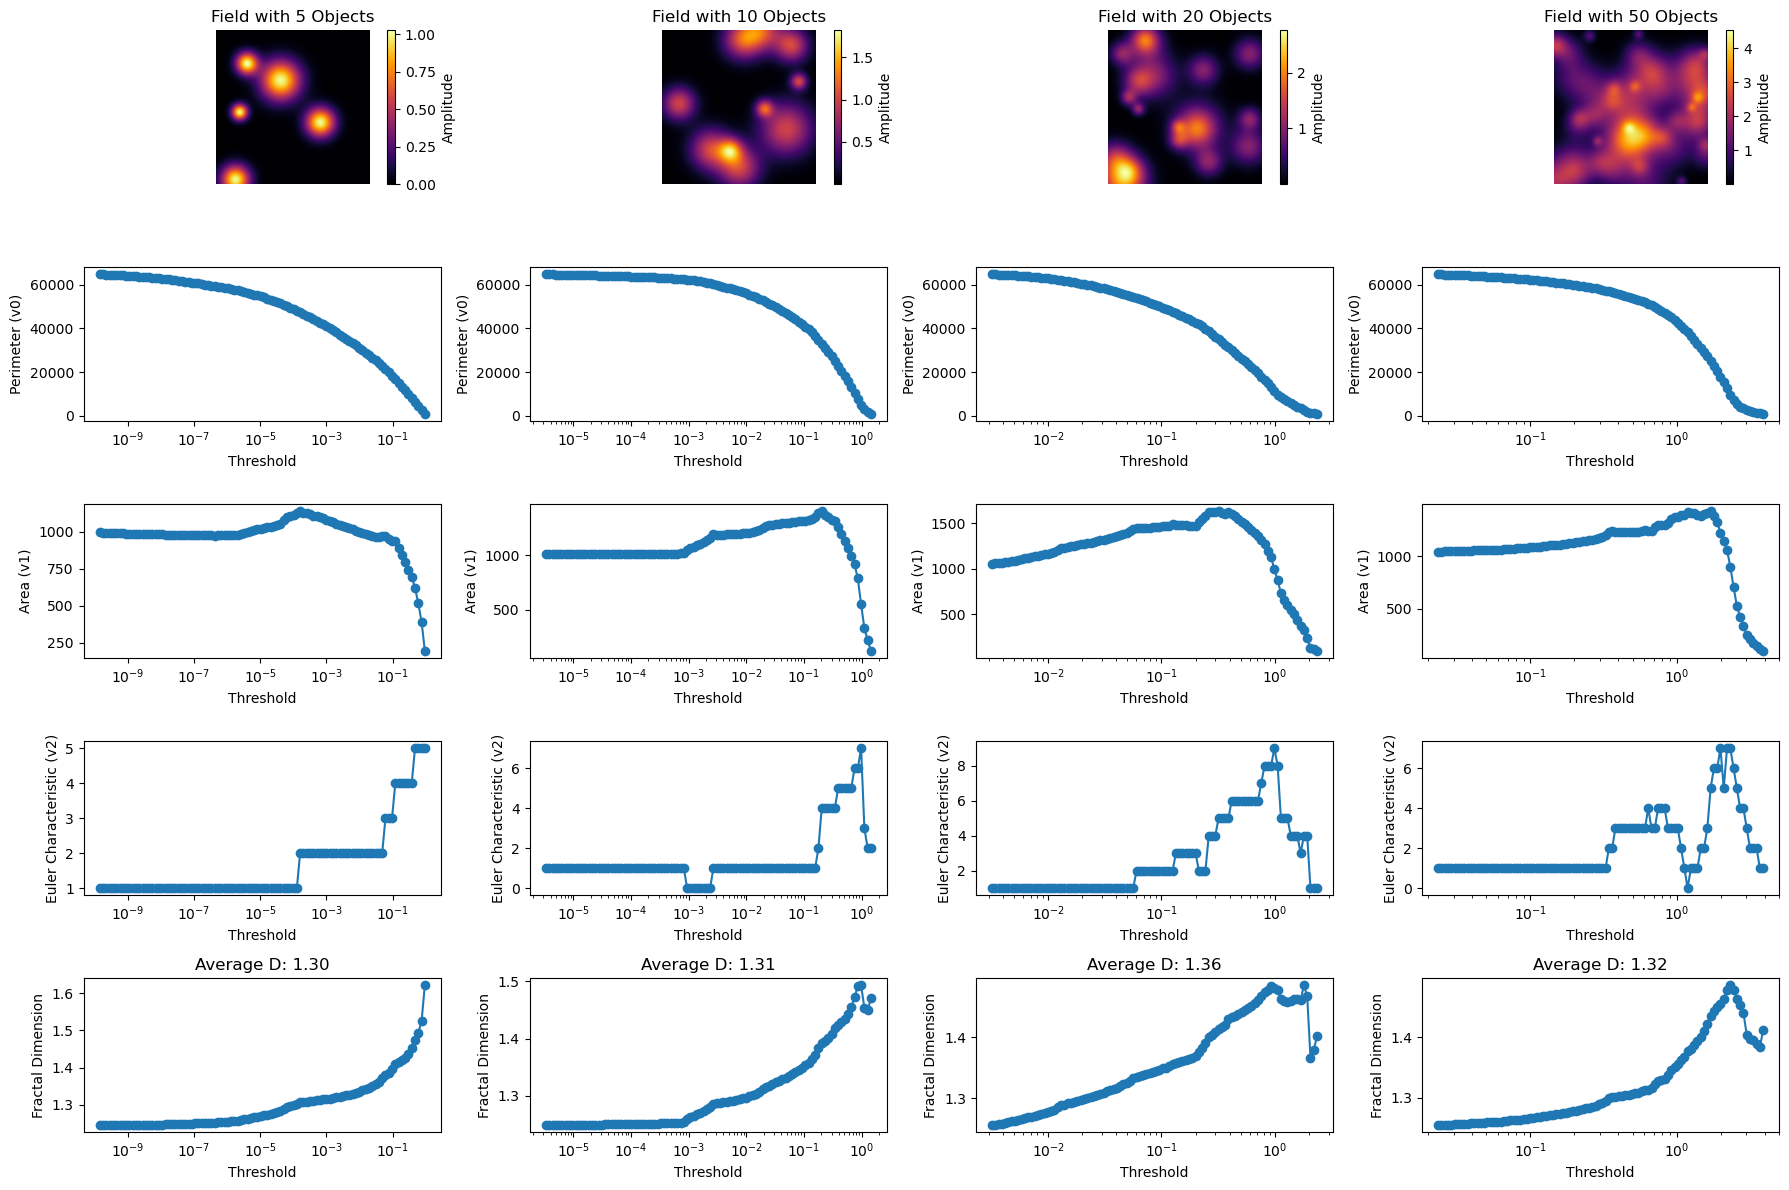

In [12]:
# Simulation parameters, only Gaussians
shape = (256, 256)
max_sigma = 30
max_length = 100
max_width = 20
object_densities = [5, 10, 20, 50]
mix_ratio = 1

# Generate and analyze fields
fields = []
results = []
for num_objects in object_densities:
    field = create_mixed_field(shape, num_objects, max_sigma, max_length, max_width, mix_ratio)
    fields.append(field)
    results.append(minkowski_funct(field, threshold_min=np.percentile(field, 1), threshold_max=np.percentile(field, 99)))

# Visualize all Gaussians and their Minkowski functional results
plt.figure(figsize=(18, 12))

# First row: Gaussian images
for i, field in enumerate(fields):
    plt.subplot(5, len(fields), i + 1)
    plt.imshow(field, origin='lower', cmap='inferno', extent=[0, shape[0], 0, shape[1]])
    plt.title(f"Field with {object_densities[i]} Objects")
    plt.colorbar(label="Amplitude")
    plt.axis("off")

# Second, third, fourth rows: Minkowski functionals
labels = ["Perimeter (v0)", "Area (v1)", "Euler Characteristic (v2)", "Fractal Dimension"]

for j in range(4):  # One row for each functional
    for i, field in enumerate(fields):
        plt.subplot(5, len(fields), (j + 1) * len(fields) + i + 1)
        plt.plot(results[i]["thresholds"], results[i]["values"][j], 'o-')
        plt.xlabel("Threshold")
        plt.ylabel(labels[j])
        plt.xscale("log")
        if j == 3:  # For the fractal dimension row
            avg_fractal_dim = np.nanmean(results[i]["values"][j]) 
            plt.title(f"Average D: {avg_fractal_dim:.2f}")
            
plt.tight_layout()
plt.show()

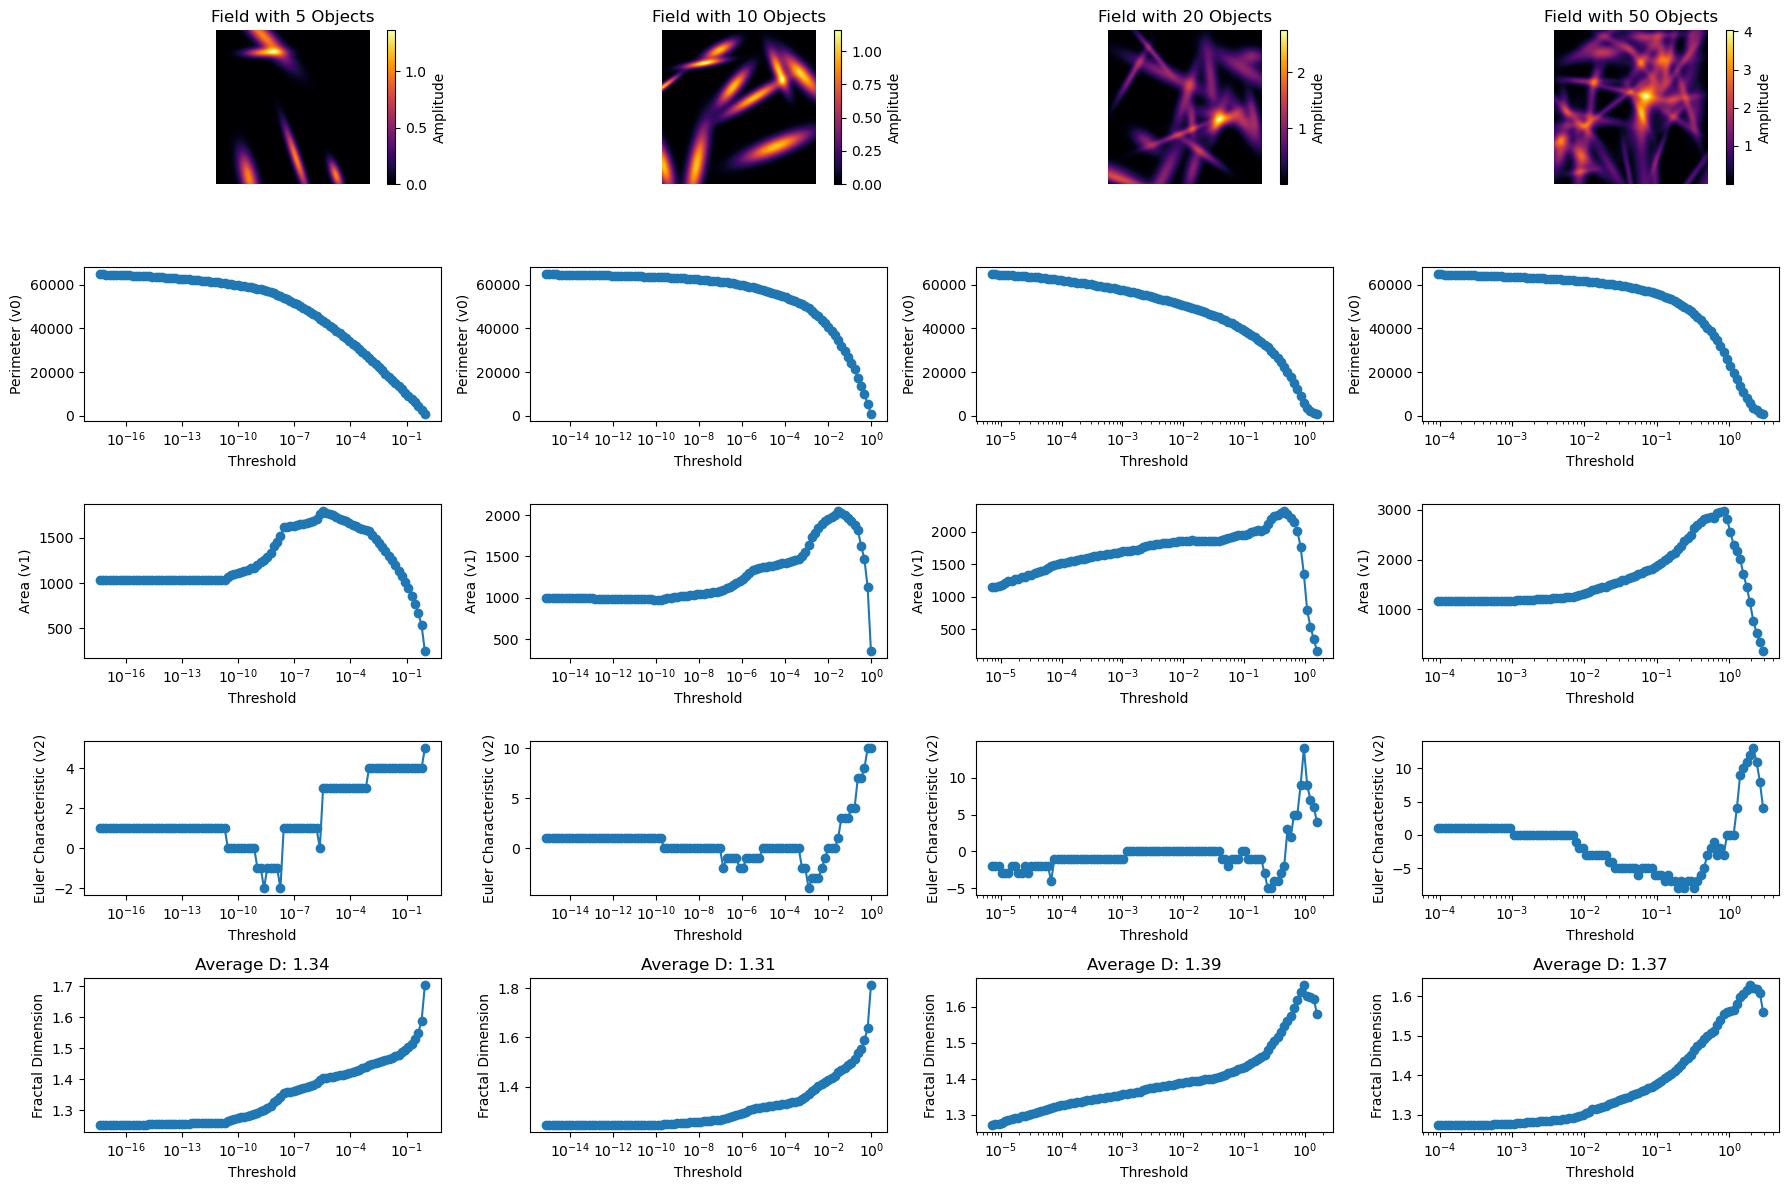

In [13]:
# Simulation parameters, only Filaments
shape = (256, 256)
max_sigma = 30
max_length = 100
max_width = 20
object_densities = [5, 10, 20, 50]
mix_ratio = 0

# Generate and analyze fields
fields = []
results = []
for num_objects in object_densities:
    field = create_mixed_field(shape, num_objects, max_sigma, max_length, max_width, mix_ratio)
    fields.append(field)
    results.append(minkowski_funct(field, threshold_min=np.percentile(field, 1), threshold_max=np.percentile(field, 99)))

# Visualize all Gaussians and their Minkowski functional results
plt.figure(figsize=(18, 12))

# First row: Gaussian images
for i, field in enumerate(fields):
    plt.subplot(5, len(fields), i + 1)
    plt.imshow(field, origin='lower', cmap='inferno', extent=[0, shape[0], 0, shape[1]])
    plt.title(f"Field with {object_densities[i]} Objects")
    plt.colorbar(label="Amplitude")
    plt.axis("off")

# Second, third, fourth rows: Minkowski functionals
labels = ["Perimeter (v0)", "Area (v1)", "Euler Characteristic (v2)", "Fractal Dimension"]

for j in range(4):  # One row for each functional
    for i, field in enumerate(fields):
        plt.subplot(5, len(fields), (j + 1) * len(fields) + i + 1)
        plt.plot(results[i]["thresholds"], results[i]["values"][j], 'o-')
        plt.xlabel("Threshold")
        plt.ylabel(labels[j])
        plt.xscale("log")
        if j == 3:  # For the fractal dimension row
            avg_fractal_dim = np.nanmean(results[i]["values"][j]) 
            plt.title(f"Average D: {avg_fractal_dim:.2f}")
            
plt.tight_layout()
plt.show()

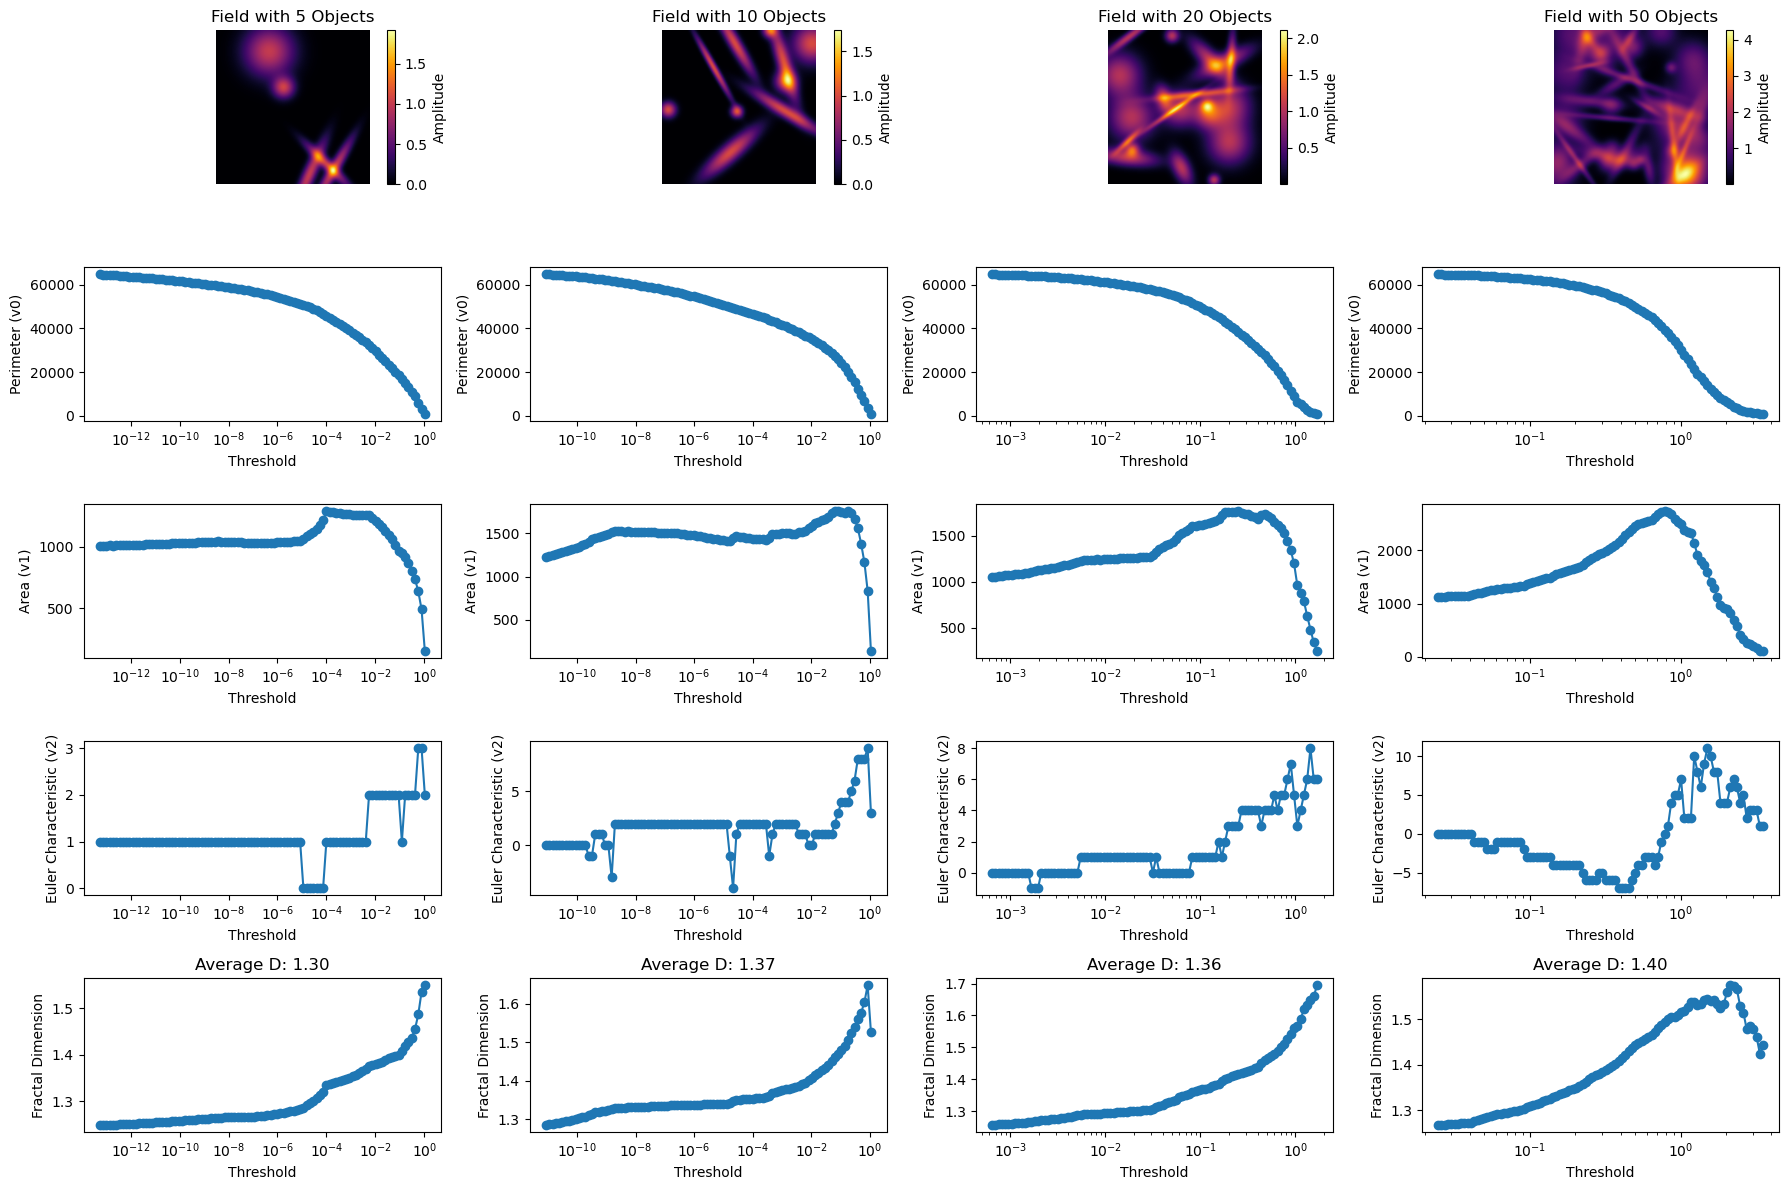

In [14]:
# Simulation parameters, only Gaussians
shape = (256, 256)
max_sigma = 30
max_length = 100
max_width = 20
object_densities = [5, 10, 20, 50]
mix_ratio = 0.5

# Generate and analyze fields
fields = []
results = []
for num_objects in object_densities:
    field = create_mixed_field(shape, num_objects, max_sigma, max_length, max_width, mix_ratio)
    fields.append(field)
    results.append(minkowski_funct(field, threshold_min=np.percentile(field, 1), threshold_max=np.percentile(field, 99)))

# Visualize all Gaussians and their Minkowski functional results
plt.figure(figsize=(18, 12))

# First row: Gaussian images
for i, field in enumerate(fields):
    plt.subplot(5, len(fields), i + 1)
    plt.imshow(field, origin='lower', cmap='inferno', extent=[0, shape[0], 0, shape[1]])
    plt.title(f"Field with {object_densities[i]} Objects")
    plt.colorbar(label="Amplitude")
    plt.axis("off")

# Second, third, fourth rows: Minkowski functionals
labels = ["Perimeter (v0)", "Area (v1)", "Euler Characteristic (v2)", "Fractal Dimension"]

for j in range(4):  # One row for each functional
    for i, field in enumerate(fields):
        plt.subplot(5, len(fields), (j + 1) * len(fields) + i + 1)
        plt.plot(results[i]["thresholds"], results[i]["values"][j], 'o-')
        plt.xlabel("Threshold")
        plt.ylabel(labels[j])
        plt.xscale("log")
        if j == 3:  # For the fractal dimension row
            avg_fractal_dim = np.nanmean(results[i]["values"][j]) 
            plt.title(f"Average D: {avg_fractal_dim:.2f}")
            
plt.tight_layout()
plt.show()

In [ ]:
# from Validity_PA_BC

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import label
from skimage.measure import perimeter


# Parameters for the Gaussian
shape = (256, 256)
centers = [(128, 128), (128, 128), (128, 128), (128, 128), (128, 128)]  # Center of Gaussian
sigmas = [15, 30, 60, 150, 300]  # Standard deviations, increasing size

# Generate Gaussian distributions
gaussians = [100*generate_2d_gaussian(shape, centers[i], sigmas[i]) for i in range(len(sigmas))]

# Analyze each Gaussian using the Minkowski function
results = []

# Visualize all Gaussians and their Minkowski functional results
plt.figure(figsize=(18, 12))
    
# Analyze each Gaussian
results = []
for i, gaussian in enumerate(gaussians):
    print(f"Analyzing Gaussian {i+1} with sigma={sigmas[i]}")
    result = circle_corrected_minkowski_functionals(gaussian, threshold_min=1, threshold_max=99)
    results.append(result)

# First row: Gaussian images
for i, gaussian in enumerate(gaussians):
    plt.subplot(5, len(gaussians), i + 1)
    plt.imshow(gaussian, origin='lower', cmap='inferno', extent=[0, shape[0], 0, shape[1]])
    plt.title(f"Gaussian {i+1}, $\sigma={sigmas[i]}$")
    plt.colorbar(label="Amplitude")
    plt.axis("off")

# Second, third, fourth rows: Minkowski functionals
labels = ["Perimeter (v0)", "Area (v1)", "Euler Characteristic (v2)", "Fractal Dimension"]
for j in range(4):  # One row for each functional
    for i, gaussian in enumerate(gaussians):
        plt.subplot(5, len(gaussians), (j + 1) * len(gaussians) + i + 1)
        plt.plot(results[i]["thresholds"], results[i]["values"][j], 'o-')
        plt.xlabel("Threshold")
        plt.ylabel(labels[j])
        plt.xscale("log")
        if j == 3:  # For the fractal dimension row
            avg_fractal_dim = np.nanmean(results[i]["values"][j]) 
            plt.title(f"Average D: {avg_fractal_dim:.2f}")
            
plt.tight_layout()
plt.show()

## Small Scales

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import label
from skimage.measure import perimeter

# Function to generate a Gaussian with potential cut-offs
def generate_2d_gaussian(shape, center, sigma):
    """
    Generate a Gaussian distribution that may cut off at the edges of the data.
    
    Parameters:
    - shape: Tuple (nx, ny), the size of the 2D grid.
    - center: Tuple (x0, y0), the center of the Gaussian.
    - sigma: Standard deviation of the Gaussian.
    
    Returns:
    - gaussian: 2D array with the Gaussian distribution.
    """
    x = np.arange(0, shape[0])
    y = np.arange(0, shape[1])
    xx, yy = np.meshgrid(x, y)
    
    gaussian = np.exp(-(((xx - center[0])**2 + (yy - center[1])**2) / (2 * sigma**2)))
    return gaussian

# Parameters for the Gaussian
shape = (256, 256)
centers = [(128, 128), (128, 128), (128, 128), (128, 128), (128, 128)]  # Center of Gaussian
sigmas = [15, 12, 10, 8, 5]  # Standard deviations, increasing size

# Generate Gaussian distributions
gaussians = [100*generate_2d_gaussian(shape, centers[i], sigmas[i]) for i in range(len(sigmas))]

# Analyze each Gaussian using the Minkowski function
results = []

# Visualize all Gaussians and their Minkowski functional results
plt.figure(figsize=(18, 12))
    
# Analyze each Gaussian
results = []
for i, gaussian in enumerate(gaussians):
    print(f"Analyzing Gaussian {i+1} with sigma={sigmas[i]}")
    result = circle_corrected_minkowski_functionals(gaussian, threshold_min=1, threshold_max=99)
    results.append(result)

# First row: Gaussian images
for i, gaussian in enumerate(gaussians):
    plt.subplot(5, len(gaussians), i + 1)
    plt.imshow(gaussian, origin='lower', cmap='inferno', extent=[0, shape[0], 0, shape[1]])
    plt.title(f"Gaussian {i+1}, $\sigma={sigmas[i]}$")
    plt.colorbar(label="Amplitude")
    plt.axis("off")

# Second, third, fourth rows: Minkowski functionals
labels = ["Perimeter (v0)", "Area (v1)", "Euler Characteristic (v2)", "Fractal Dimension"]

for j in range(4):  # One row for each functional
    for i, gaussian in enumerate(gaussians):
        plt.subplot(5, len(gaussians), (j + 1) * len(gaussians) + i + 1)
        plt.plot(results[i]["thresholds"], results[i]["values"][j], 'o-')
        plt.xlabel("Threshold")
        plt.ylabel(labels[j])
        plt.xscale("log")
        if j == 3:  # For the fractal dimension row
            avg_fractal_dim = np.nanmean(results[i]["values"][j]) 
            plt.title(f"Average D: {avg_fractal_dim:.2f}")
            
plt.tight_layout()
plt.show()

## Inspecting a Gaussian at different thresholds

# Filaments

# Combination